## Plot SSAM (multifreq rsam) v1.0

In [1]:
# Import library
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import matplotlib.dates as mdates
import matplotlib.ticker as mticker

# Definisikan directory data, nama gunung, nama stasiun dan komponen
directory = r"//192.189.22.130/data/ssam/16channel/MLLR"
gunung = 'RAUNG'
stasiun = "MLLR"
komponen = "EHZ"

# Tentukan tanggal awal, tanggal akhir, dan interval axis
waktu_awal = '01-02-2025'
waktu_akhir = '10-04-2025'
interval_hari = 5

# Mengambil nilai bulan dan tahun sesuai waktu yang ditentukan
start_year = int(waktu_awal[6:])
end_year = int(waktu_akhir[6:])
start_month = int(waktu_awal[3:5])
end_month = int(waktu_akhir[3:5])

# Proses menggabungkan file-file ssam
# Nama file ssam harus memiliki format standar earthworm, yaitu "yyyymmdd_station_component_network.dat", contoh "20240508_MLLR_EHZ_VG.dat"
merged_data = pd.DataFrame()
files_to_merge = []  # Variabel ntuk menyimpan daftar file yang akan digabungkan
for filename in os.listdir(directory):
    if filename.endswith(".dat"):
        # Membaca nama file
        try:
            year = int(filename[:4])
            month = int(filename[4:6])
            channel_name = filename[9:13]
            component = filename[14:17]
        except ValueError:
            # Skip file jika tidak dapat di-parse sebagai angka untuk tahun dan bulan
            continue
        # Memeriksa apakah file cocok dengan kriteria sesuai waktu awal, waktu akhir, nama stasiun dan komponen yang ditentukan sebelumnya
        if (start_year < end_year):
            if ((year == start_year and month >= start_month) or (year == end_year and month <= end_month)) and channel_name == stasiun and component == komponen:
                files_to_merge.append(filename)  # Menambahkan nama file ke daftar
                # Membaca file dan menggabungkannya
                filepath = os.path.join(directory, filename)
                data = pd.read_csv(filepath, sep=' ', header=None, names=['Date', 'Time', '0', '0.5', '1', '1.5', '2', '2.5', '3', '3.5', '4', '4.5', '5', '5.5', '6', '8', '10', '15', '20'])
                merged_data = pd.concat([merged_data, data], ignore_index=True)
        else:
            if (year == start_year and month >= start_month and year == end_year and month <= end_month) and channel_name == stasiun and component == komponen:
                files_to_merge.append(filename)  # Menambahkan nama file ke daftar
                # Membaca file dan menggabungkannya
                filepath = os.path.join(directory, filename)
                data = pd.read_csv(filepath, sep=' ', header=None, names=['Date', 'Time', '0', '0.5', '1', '1.5', '2', '2.5', '3', '3.5', '4', '4.5', '5', '5.5', '6', '8', '10', '15', '20'])
                merged_data = pd.concat([merged_data, data], ignore_index=True)

# Mencetak daftar file yang digabungkan dan nilai datanya
print("\nFile yang digabungkan: ")
print("--------------------------------")
if len(files_to_merge) <= 10:
    for item in files_to_merge:
        print(item)
else:
    for item in files_to_merge[:5]:
        print(item)
    print("...")
    for item in files_to_merge[-5:]:
        print(item)
print("Jumlah file : ", len(files_to_merge))
print("________________________________")
print("\nData (5 baris pertama dan 5 baris terakhir:)")
print("--------------------------------")

# Menggabungkan kolom Date dan Time menjadi satu kolom dateTime
merged_data['dateTime'] = pd.to_datetime(merged_data['Date'] + ' ' + merged_data['Time'], format='%d-%b-%Y %H:%M')
merged_data = merged_data.drop(columns=['Date', 'Time'])
merged_data.insert(0, 'dateTime', merged_data.pop('dateTime'))

# print(merged_data)

# Band frekuensi. Nilai dari kolom yang dipilih akan dirata-ratakan.
# Bila ingin menambahakan band baru, tambahkan baris baru di bawah.
# String di dalam merged_data[''] adalah judul band (judul kolom band baru)
# Nilai di dalam merged_data.iloc[:, x:xx] adalah nomor kolom pada data dengan x adalah kolom awal dan xx adalah kolom akhir +1
# (perhatikan tabel data di bawah jika data tersedia)
# contoh : merged_data['low (1-5) Hz'] = merged_data.iloc[:, 1:12].mean(axis=1)
# artinya membuat kolom baru dengan judul 'low (1-5)' yang isinya adalah data rata-rata dari kolom 2-12 (indeks kolom dimulai dari 0)
merged_data['low (1-5 Hz)'] = merged_data.iloc[:, 1:12].mean(axis=1)
merged_data['mid (6-10 Hz)'] = merged_data.iloc[:, 12:16].mean(axis=1)
merged_data['hi (10-20) Hz'] = merged_data.iloc[:, 15:18].mean(axis=1)

print(merged_data)


File yang digabungkan: 
--------------------------------
20250201_MLLR_EHZ_RC.dat
20250201_MLLR_EHZ_VG.dat
20250202_MLLR_EHZ_RC.dat
20250202_MLLR_EHZ_VG.dat
20250203_MLLR_EHZ_RC.dat
...
20250403_MLLR_EHZ_RC.dat
20250403_MLLR_EHZ_VG.dat
20250408_MLLR_EHZ_RC.dat
20250408_MLLR_EHZ_VG.dat
20250410_MLLR_EHZ_VG.dat
Jumlah file :  119
________________________________

Data (5 baris pertama dan 5 baris terakhir:)
--------------------------------
                  dateTime  0  0.5  1  1.5  2  2.5   3  3.5  4  ...  5  5.5  \
0      2025-02-01 00:00:00  0    0  0    0  0    0   0    0  0  ...  0    0   
1      2025-02-01 00:01:00  0    0  0    0  0    0   0    0  0  ...  0    0   
2      2025-02-01 00:02:00  0    0  0    0  0    0   0    0  0  ...  0    0   
3      2025-02-01 00:03:00  0    0  0    0  0    0   0    0  0  ...  0    0   
4      2025-02-01 00:04:00  0    0  0    0  0    0   0    0  0  ...  0    0   
...                    ... ..  ... ..  ... ..  ...  ..  ... ..  ... ..  ...   
1573

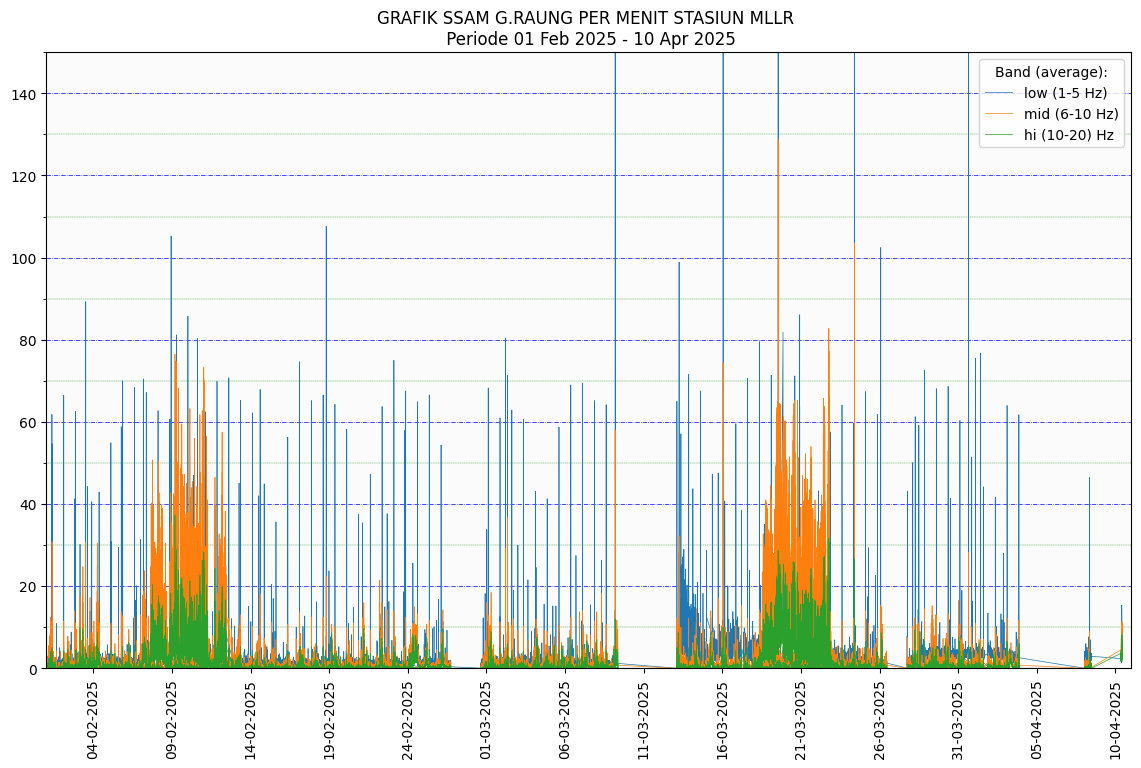

Data Terakhir : 10-Apr-2025 17:21 WIB


In [2]:
# Interval sumbu Y
major_interval = 20
minor_interval = 10

start_date = datetime.strptime(waktu_awal, '%d-%m-%Y')
end_date = datetime.strptime(waktu_akhir, '%d-%m-%Y')
end_date += timedelta(days=1)
data_bulan = merged_data[(merged_data['dateTime'] >= start_date) & (merged_data['dateTime'] <= end_date)]
ssam_columns = merged_data.columns[18:]

plt.figure(figsize=(14, 8))

for col in ssam_columns:    
    plt.plot(data_bulan['dateTime'], data_bulan[col], label=col, marker='', linestyle='-', linewidth=0.5)
    
plt.gca().xaxis.set_major_locator(mdates.DayLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
plt.xticks(rotation=90)
# plt.ylabel('ssam')
    
start_date = datetime.strptime(waktu_awal, '%d-%m-%Y')
end_date = datetime.strptime(waktu_akhir, '%d-%m-%Y')

formatted_start_date = start_date.strftime('%d %b %Y')
formatted_end_date = end_date.strftime('%d %b %Y')

plt.title(f'GRAFIK SSAM G.{gunung} PER MENIT STASIUN {stasiun} \n Periode {formatted_start_date} - {formatted_end_date}')
end_date += timedelta(days=1)

# Nilai maksimum count pada data :
nilai_maksimal_data = int(data_bulan[ssam_columns].max().max()) + 1

# Nilai maksimum pada grafik bisa diubah di sini bila 'nilai_maksimum_custom' yang digunakan :
nilai_maksimum_custom = 150

# Pilih nilai maksimum yang ingin digunakan 'nilai_maksimal_data' atau 'nilai_maksimum_custom'
nilai_maksimum = nilai_maksimum_custom

plt.gca().set_ylim(0, nilai_maksimum)
plt.xlim(start_date, end_date)
plt.yticks(range(0, nilai_maksimum, major_interval))
plt.ylim(0)

plt.grid(which='major', axis='y', linestyle='-.', color='blue', linewidth=0.5)
plt.grid(which='minor', axis='y', linestyle='--', color='green', linewidth=0.25)
plt.gca().yaxis.set_minor_locator(plt.MultipleLocator(minor_interval))
days = mdates.DayLocator(interval=interval_hari)
plt.gca().xaxis.set_major_locator(days)
plt.axvspan(start_date, end_date, facecolor='whitesmoke', alpha=0.35)
plt.legend(title="Band (average):")
plt.show()

last_row = merged_data.iloc[-1]
timestamp_terakhir = last_row['dateTime']
utc7 = timestamp_terakhir + pd.Timedelta(hours=7)
wib_time = utc7.strftime('%d-%b-%Y %H:%M')

print("Data Terakhir :", wib_time, "WIB")

# Mukijo-PVMBG, 2023
# 0856-4334-6785